# Fill in your name!

In [28]:
YOUR_NAME = "sravya"

# imports and constants

In [29]:
import pickle
import json
from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np
import random
from IPython.display import display, clear_output

In [30]:
CATEGORIES = json.load(open('categories_edited.json', 'r'))
CATEGORIES 

{'0': 'healthcare',
 '1': 'economy and government',
 '10': 'beach',
 '11': 'education',
 '12': 'mobile phones and devices',
 '13': 'food',
 '14': 'cars and driving',
 '15': 'culture and colors',
 '16': 'money and finances',
 '17': 'energy and environment',
 '18': 'house and home',
 '19': 'business and technology',
 '2': 'work and positivity',
 '3': 'celebrations and family',
 '4': 'Internet and social media',
 '5': 'international world',
 '6': 'body and health',
 '7': 'shopping and travel',
 '8': 'online shopping',
 '9': 'marketing'}

In [16]:
#BASE_PATH_INFO = "http://thumbnails.visually.netdna-cdn.com/most-trendy-outfit-january-2013_510ba1d15148b.jpg"
BASE_PATH_INFO = "test/final/"
BASE_PATH_DATA = "../visuallydata/"
SAMPLE_INFOGRAPHIC = "the-facts-about-heart-disease_50290aaf3b5fd.jpg"

In [17]:
infographics = json.load(open('study_infographics.json', 'r'))
INFOGRAPHIC_PATHS = [elt['url'] for elt in infographics]
INFOGRAPHIC_PATHS

['the-facts-about-heart-disease_50290aaf3b5fd.jpg',
 'super-dad_502910d3ad406.png',
 'hunters-vs-farmers-sales-personas_51e5924c2f823.png',
 'calories-in-wine-vs-beer_50982977dc9eb.jpg',
 'telecom-present--the-future_530b60f629fab.jpg',
 'clean-cities-national-parks-initiative_516c6bb16bc8c.png',
 'anatomy-of-a-wedding-gown_51c3402050877.jpg',
 '31-days-of-refreshingly-chilled-lemonade_5029153eb8c76.png',
 'why-india-cant-feed-her-people_50290b996c340.jpg',
 'how-much-co2-does-the-internet-produce_50290d6d43b74.jpg',
 'texting-while-driving-statistics--facts_50290ab6860e7.png',
 'a-geographical-trap-landlocked-developing-countries_50951a6dacde9.jpg']

In [7]:
LABELS_FILE = YOUR_NAME + "_hand_icon_labels.txt"
LABELS_FILE

'sravya_hand_icon_labels.txt'

# download bounding boxes

In [ ]:
detectionsList = pickle.load(open(BASE_PATH_DATA + "icon_annotations_all.pickle", "rb"))

In [26]:
def show_bbox(im, box): 
    im = Image.open(im)
    w,h = im.size
    
    bottom = int(box['bottom']*h)
    top = int(box['top']*h)
    left = int(box['left']*w)
    right = int(box['right']*w)

    
    #bboxnums = encoded_bbox.split(" ")
#     left = int(w*float(bboxnums[0])/1000.0)
#     top = int(h*float(bboxnums[1])/1000.0)
#     right = int(w*float(bboxnums[2])/1000.0)
#     bottom = int(h*float(bboxnums[3])/1000.0)
#     width = right - left
#     height = bottom - top
    
    cropped_im = im.crop((left, top, right, bottom))
#     %matplotlib inline
#     imshow(np.asarray(cropped_im))
    display(cropped_im)

# Helpers

In [35]:
def print_instructions(): 
    print("For each icon, please identify the most relevant categories.")
    print("\n")
    print("Please write the three most relevant ids, IN ORDER")
    print("\n")
    print("For instance, if you think the most relevant category for the icon is <category 1>, the next most relevant is <category 2>, and the third most relevant is <category 3>, you would input `1 2 3` in the input box.")
    print("\n")
    print("If you have no idea what is being shown in the icon, just write the letter 'x'")
    print("The category ids are as below in the form <category id>: <category name>")
    print("\n")
    
#print_instructions()

In [36]:
def print_category_options(): 
    print("CATEGORY OPTIONS: ")
    for i in range(len(CATEGORIES)): 
        key = str(i)
        val = CATEGORIES[key]
        print("\t%s: %s" % (key, val))
    print("\n")
#print_category_options()

In [37]:
def get_cat_labels(): 
    return input('Write down your top three category labels for this icon, in order.')

In [38]:
def write_label(infographic_name, icon_idx, answer): 
    print("writing!")
    line = "%s %d %s\n" % (infographic_name, icon_idx, answer)
    with open(LABELS_FILE, 'a') as outfile: 
        outfile.write(line)

# Prep Data

In [43]:
tasks = []
for info in INFOGRAPHIC_PATHS: 
    n_bboxes = len(detectionsList[info])
    print(n_bboxes, info)
    for i in range(n_bboxes): 
        tasks.append((info, i))
       
random.shuffle(tasks)
len(tasks)

25 the-facts-about-heart-disease_50290aaf3b5fd.jpg
9 super-dad_502910d3ad406.png
16 hunters-vs-farmers-sales-personas_51e5924c2f823.png
9 calories-in-wine-vs-beer_50982977dc9eb.jpg
17 telecom-present--the-future_530b60f629fab.jpg
1 clean-cities-national-parks-initiative_516c6bb16bc8c.png
9 anatomy-of-a-wedding-gown_51c3402050877.jpg
69 31-days-of-refreshingly-chilled-lemonade_5029153eb8c76.png
7 why-india-cant-feed-her-people_50290b996c340.jpg
0 how-much-co2-does-the-internet-produce_50290d6d43b74.jpg
17 texting-while-driving-statistics--facts_50290ab6860e7.png
5 a-geographical-trap-landlocked-developing-countries_50951a6dacde9.jpg


184

# Run task

For each icon, please identify the most relevant categories.


Please write the three most relevant ids, IN ORDER


For instance, if you think the most relevant category for the icon is <category 1>, the next most relevant is <category 2>, and the third most relevant is <category 3>, you would input `1 2 3` in the input box.


If you have no idea what is being shown in the icon, just write the letter 'x'
The category ids are as below in the form <category id>: <category name>


CATEGORY OPTIONS: 
	0: healthcare
	1: economy and government
	2: work and positivity
	3: celebrations and family
	4: Internet and social media
	5: international world
	6: body and health
	7: shopping and travel
	8: online shopping
	9: marketing
	10: beach
	11: education
	12: mobile phones and devices
	13: food
	14: cars and driving
	15: culture and colors
	16: money and finances
	17: energy and environment
	18: house and home
	19: business and technology




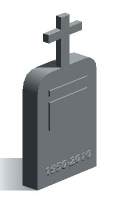

KeyboardInterrupt: 

In [40]:
for t in tasks: 
    print_instructions()
    print_category_options()
    info, bbox_idx = t
    bbox = detectionsList[info][bbox_idx]
    show_bbox(BASE_PATH_INFO + info, bbox)
    answer = get_cat_labels()
    write_label(info, bbox_idx, answer)
    clear_output()    